<a href="https://colab.research.google.com/github/fakhruddinarif/imgpro-compvis/blob/main/modul10/modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

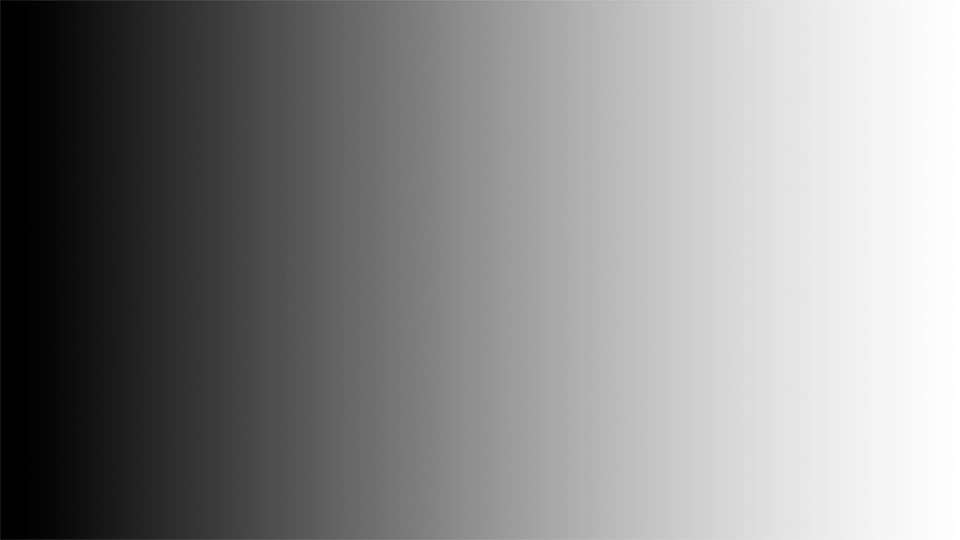

In [3]:
image_gradient = cv.imread('/content/drive/MyDrive/imgpro_compvis/gradient.jpg')
cv2_imshow(image_gradient)
image_gradient= cv.cvtColor(image_gradient, cv.COLOR_BGR2GRAY)

In [4]:
def otsu_threshold(image):
    # Menghitung histogram
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    total_pixels = image.size

    # Inisialisasi variabel
    sum_total = np.sum(np.arange(256) * hist)
    sum_background = 0
    weight_background = 0
    weight_foreground = 0

    max_variance = 0
    threshold = 0

    for i in range(256):
        weight_background += hist[i]  # Update weight background
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += i * hist[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Hitung varians antar kelas
        variance_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Update ambang batas jika varians lebih besar dari yang sebelumnya
        if variance_between > max_variance:
            max_variance = variance_between
            threshold = i

    return threshold


def manual_threshold(image, threshold=None, max_value=255, threshold_type='BINARY', use_otsu=False):
    # Membuat salinan dari citra input untuk menghindari modifikasi langsung
    thresholded_image = np.zeros_like(image)

    # Jika Otsu diaktifkan, hitung threshold menggunakan metode Otsu
    if use_otsu:
        threshold = otsu_threshold(image)

    # Menerapkan thresholding berdasarkan jenis yang ditentukan
    for i in range(image.shape[0]):  # Iterasi setiap baris
        for j in range(image.shape[1]):  # Iterasi setiap kolom
            if threshold_type == 'BINARY':
                if image[i, j] > threshold:
                    thresholded_image[i, j] = max_value
                else:
                    thresholded_image[i, j] = 0

            elif threshold_type == 'BINARY_INV':
                if image[i, j] > threshold:
                    thresholded_image[i, j] = 0
                else:
                    thresholded_image[i, j] = max_value

            elif threshold_type == 'TRUNC':
                if image[i, j] > threshold:
                    thresholded_image[i, j] = threshold
                else:
                    thresholded_image[i, j] = image[i, j]

            elif threshold_type == 'TOZERO':
                if image[i, j] > threshold:
                    thresholded_image[i, j] = image[i, j]
                else:
                    thresholded_image[i, j] = 0

            elif threshold_type == 'TOZERO_INV':
                if image[i, j] > threshold:
                    thresholded_image[i, j] = 0
                else:
                    thresholded_image[i, j] = image[i, j]

    return thresholded_image

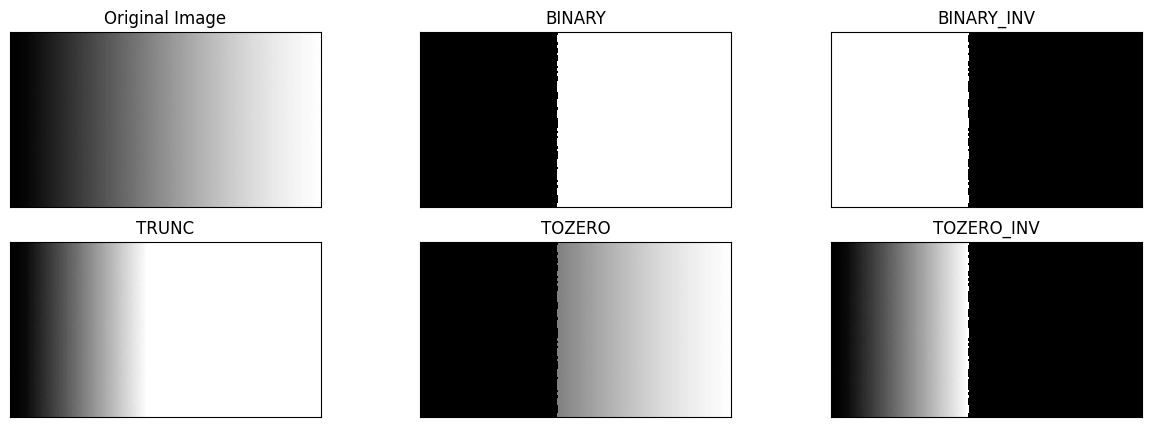

In [5]:
thres = 127

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1 = manual_threshold(image_gradient, thres, 255, 'BINARY')


#2. thresh2 adalah binary threshold inverse
thresh2 =  manual_threshold(image_gradient, thres, 255, 'BINARY_INV')


#3. Threshold Truncate
thresh3 =  manual_threshold(image_gradient, thres, 255, 'TRUNC')


#4 Threshold Tozero
thresh4 = manual_threshold(image_gradient, thres, 255, 'TOZERO')


#5 Threshold Tozero Inverse
thresh5 = manual_threshold(image_gradient, thres, 255, 'TOZERO_INV')


titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image_gradient, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

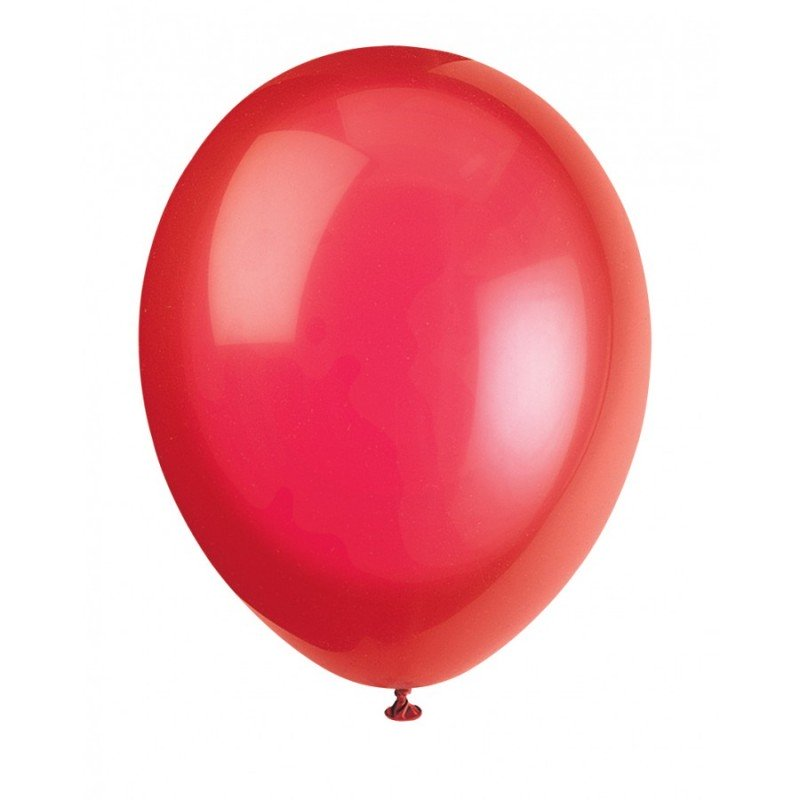

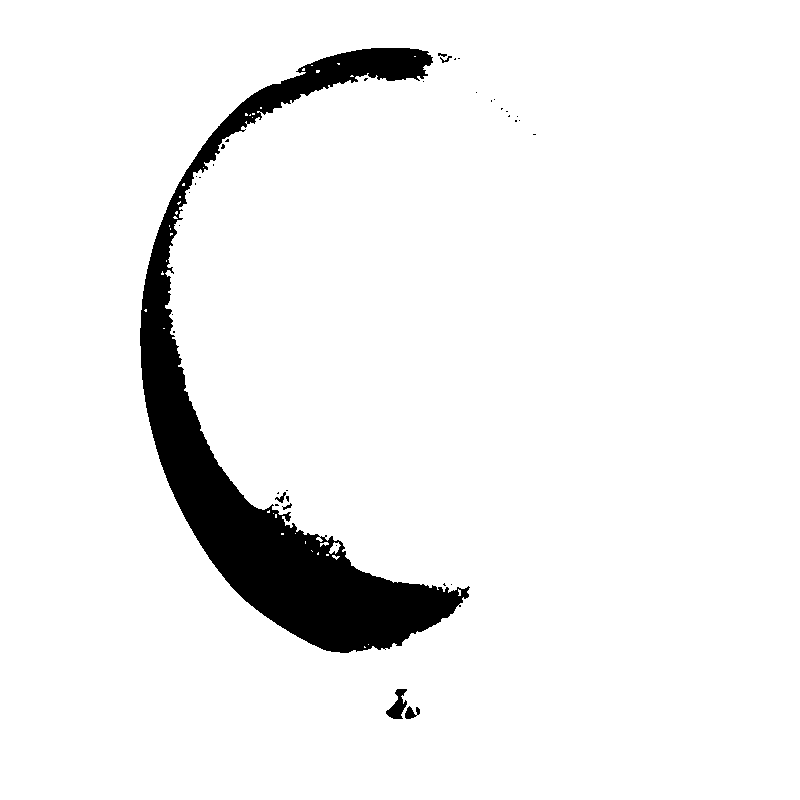

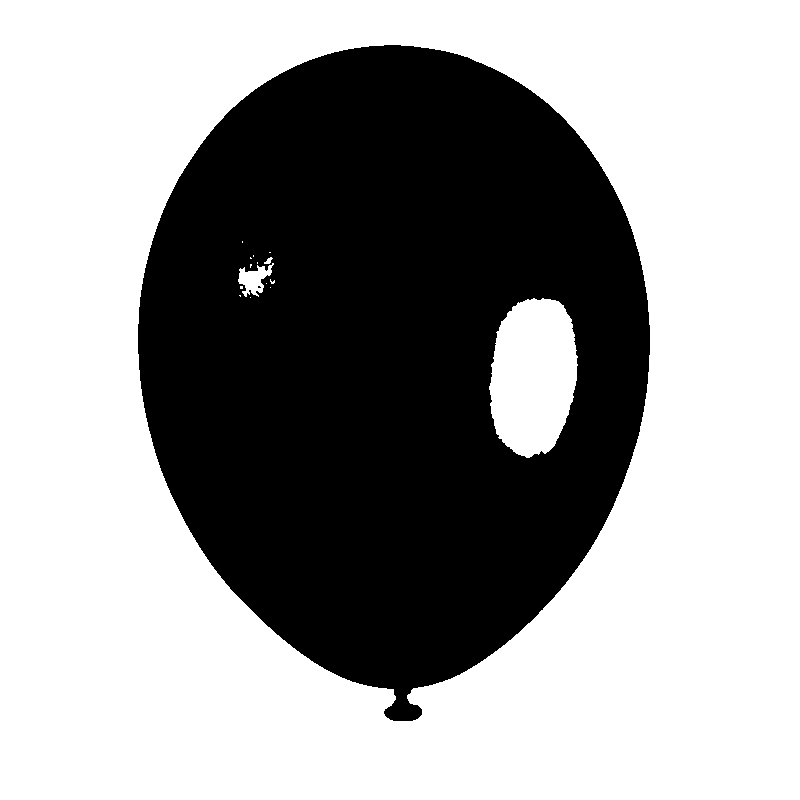

In [6]:
image_baloon = cv.imread('/content/drive/MyDrive/imgpro_compvis/balloon.jpg')
cv2_imshow(image_baloon)
image_baloon= cv.cvtColor(image_baloon, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(image_baloon, (5,5), 0)
thres = 90

th1 = manual_threshold(blur, thres, 255, 'BINARY')
th2 = manual_threshold(blur, None, 255, 'BINARY',True)
cv2_imshow(th1)
cv2_imshow(th2)

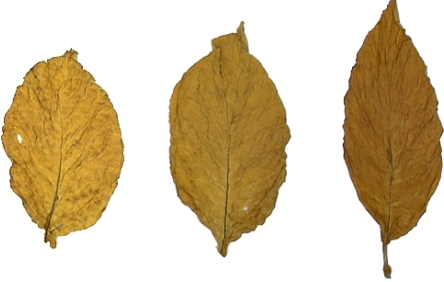

In [7]:
image_tobacco = cv.imread('/content/drive/MyDrive/imgpro_compvis/tobacco.jpg')
cv2_imshow(image_tobacco)

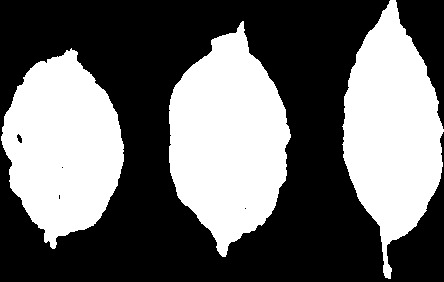

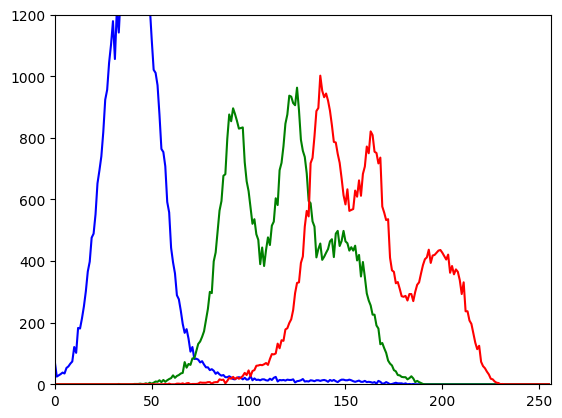

In [8]:

image_tobacco_gray = cv.cvtColor(image_tobacco, cv.COLOR_BGR2GRAY)
ret,th1 = cv.threshold(image_tobacco_gray,127,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2_imshow(th1)
chans = cv.split(image_tobacco)
colors = 'b', 'g', 'r'
for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], th1, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])


plt.show()

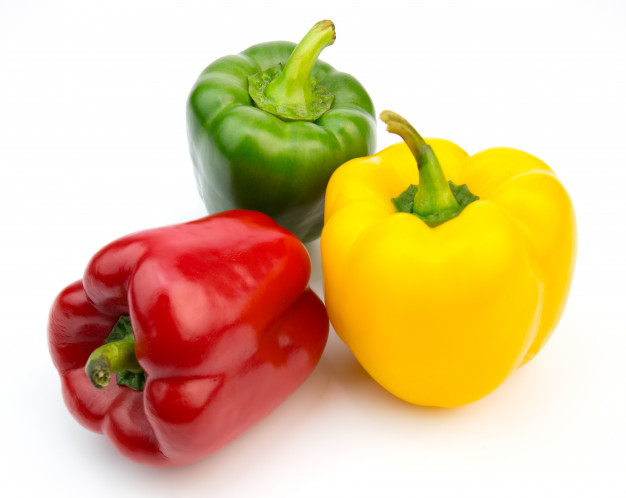

In [9]:
# KMeans segmentation
image_peppers = cv.imread('/content/drive/MyDrive/imgpro_compvis/peppers.jpg')
cv2_imshow(image_peppers)
image_peppers = cv.cvtColor(image_peppers, cv.COLOR_BGR2RGB)

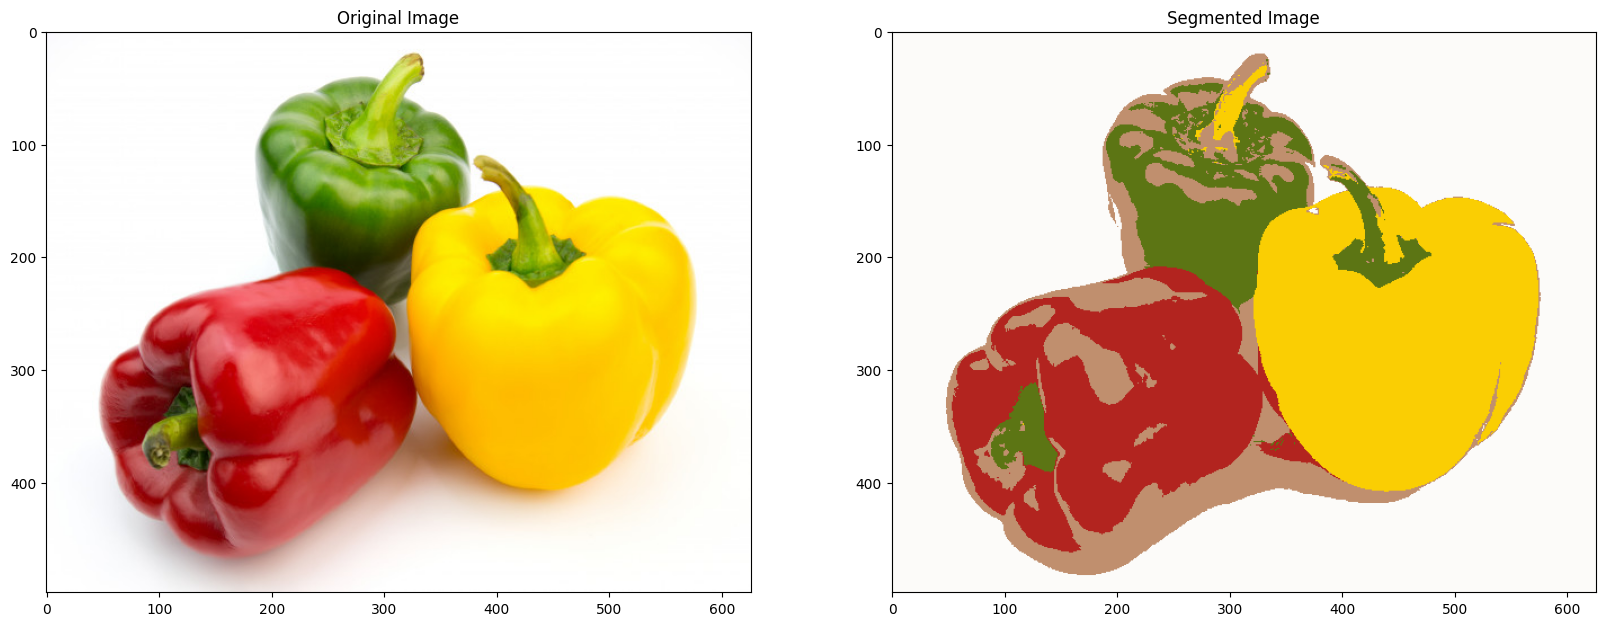

In [10]:
# Kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D selanjutnya kita akan perlu melakukan flattening array image masukan

# reshape array ke bentuk 2D
pixel_values = image_peppers.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# syarat berhenti iterasi dari KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen).
# Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid sekarang dengan posisi centroid di iterasi sebelumnya) < 0.2

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# jika diperhatikan pada image asli, terdapat 4 warna utama (merah,hijau, yellow,putih). untuk percobaan ini kita gunakan 4 clustering
k = 5
_,labels,(centers) =cv.kmeans(pixel_values,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Konversi titik centorid kedalam integer
centers = np.uint8(centers)

# flattening label_array
labels = labels.flatten()

# konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]


# reshape kembali ke bentuk aslinya
segmented_image = segmented_image.reshape(image_peppers.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(image_peppers),plt.title('Original Image')
plt.subplot(1,2,2),plt.imshow(segmented_image),plt.title('Segmented Image')
plt.show()

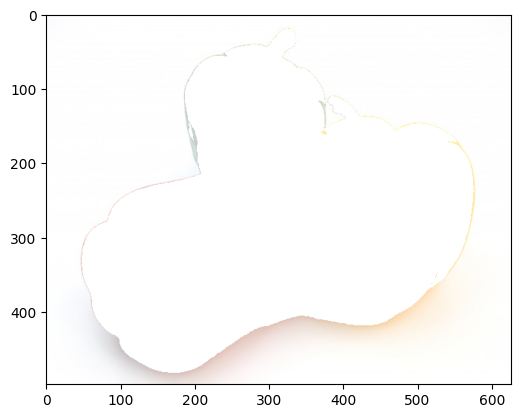

In [20]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(image_peppers)
# konvert ke bentuk vector
masked_image = masked_image.reshape((-1,3))
# cluster yang diubah
masked_image[labels == 4] = [255,255,255]
masked_image[labels == 2] = [255,255,255]
masked_image[labels == 3] = [255,255,255]
masked_image[labels == 1] = [255,255,255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(image_peppers.shape)
plt.imshow(masked_image)

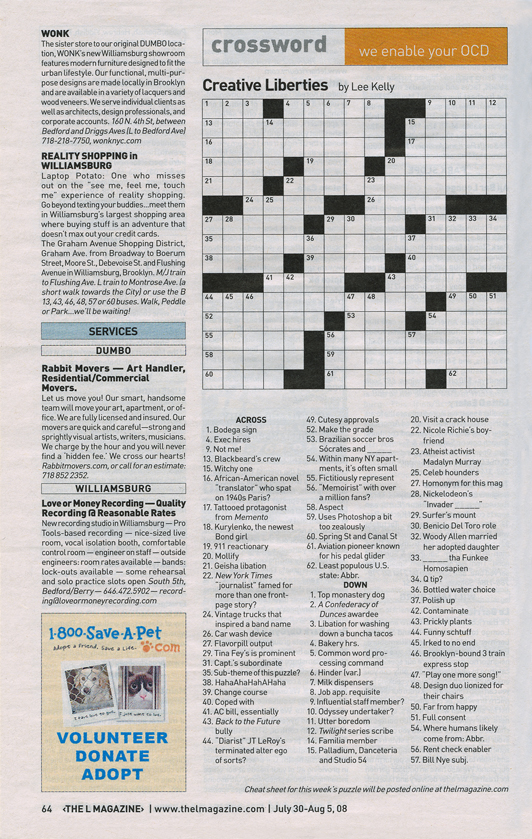

In [15]:
image_crossword=  cv.imread('/content/drive/MyDrive/imgpro_compvis/crossword.jpg')
cv2_imshow(image_crossword)

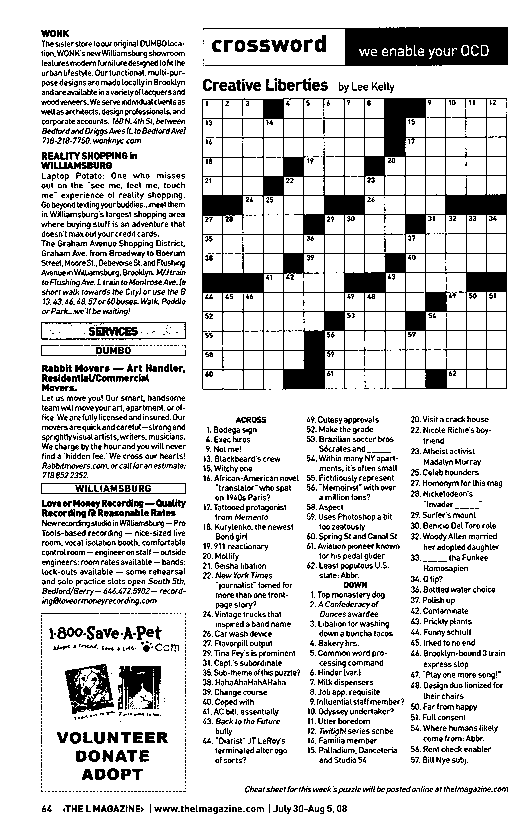

In [18]:
image_crossword = cv.cvtColor(image_crossword, cv.COLOR_BGR2GRAY)
ret,thres = cv.threshold(image_crossword, 127, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
cv2_imshow(thres)